### 轮廓检测

(150, 126)
4
重心： 62 74
面积： 18625.0
周长： 548.0


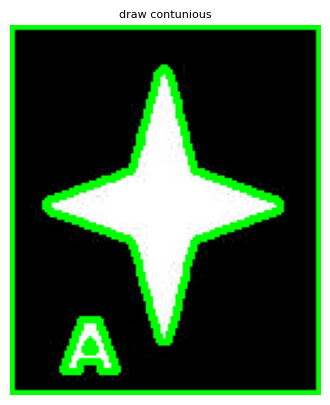

In [12]:
import numpy as np

# AUTHOR    ：Lv Wenchao
# @FileName : 轮廓.py
# @Software : PyCharm
import cv2
import matplotlib.pyplot as plt

from utils import show_image

# 论文查找一般是二值图像，前景物体为白色，背景为黑色
img = cv2.imread("../sample_data/star.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print(img_gray.shape)

"""
轮廓检测
cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
CV_RETR_LIST   检测所有的轮廓，包括内围、外围轮廓，但是检测到的轮廓不建立等级关系，彼此之间独立，没有等级关系，这就意味着这个检索模式下不存在父轮廓或内嵌轮廓
CV_RETR_CCOMP  检测所有的轮廓，但所有轮廓只建立两个等级关系
CV_RETR_TREE， 检测所有轮廓，所有轮廓建立一个等级树结构。外层轮廓包含内层轮廓，内层轮廓还可以继续包含内嵌轮廓。
查找轮廓会修改原始函数
"""
# 返回轮廓以及轮廓结构
# 轮廓为边界点M的坐标
contours, hierarchy = cv2.findContours(threshold.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# 轮廓的数量
print(len(contours))
# 绘制轮廓
draw_res = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)
show_image((1, 1, 1), draw_res, "draw contunious")
# plt.show()

# 轮廓的特征
# 计算轮廓的矩
# 通过矩能得到轮廓的重心，重心具有方向不变性和旋转不变性
cn0 = contours[0]
# 计算重心
M = cv2.moments(cn0)
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
print("重心：", cx, cy)

# 计算面积
area = cv2.contourArea(cn0)
print("面积：", area)

# 计算周长
perimeter = cv2.arcLength(cn0, True)
print("周长：", perimeter)

# 凸包献策


### 边界矩阵
- 直边型矩阵
不考虑旋转,返回左上角坐标以及宽高
```python
import cv2
cv2.boundingRect(cnt)
```
- 旋转的边界矩阵
考虑旋转，面积最小
```python
cv2.minAreaRect()
```

len of cn: 1
76 87 132 121
[[ 75 111]
 [114  72]
 [227 185]
 [188 224]]


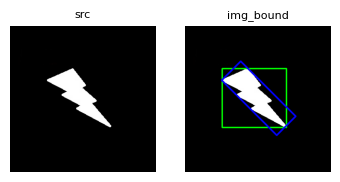

In [21]:
img = cv2.imread("../sample_data/lighting.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("len of cn:", len(contours))

# 直边型矩阵
cn = contours[0]
x, y, w, h = cv2.boundingRect(cn)
print(x, y, w, h)
# 旋转边界矩阵
# 返回box2d 结构，包含左上角点、宽高以及旋转角度
rect = cv2.minAreaRect(cn)
# 获取矩形的四个点
box = cv2.boxPoints(rect)
box = np.int0(box)
print(box)

img_bound = cv2.rectangle(img.copy(), (x, y), (x + w, y + h), (0, 255, 0), 2)
img_bound = cv2.drawContours(img_bound, [box], -1, (0, 0, 255), 2)
show_image((1, 3, 1), img, "src")
show_image((1, 3, 2), img_bound, "img_bound")

### 外接圆
返回圆心和半径
### 拟合椭圆

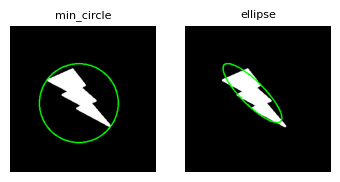

In [27]:
(x, y), randius = cv2.minEnclosingCircle(cn)
center = (int(x), int(y))
randius = int(randius)
img_circle = cv2.circle(img.copy(), center, randius, (0, 255, 0), 2)
ellipse = cv2.fitEllipse(cn)
img_ellipse = cv2.ellipse(img, ellipse, (0, 255, 0), 2)
show_image((1, 3, 1), img_circle, "min_circle")
show_image((1, 3, 2), img_ellipse, "ellipse")

### 形状匹配

In [31]:
img1 = cv2.imread("../sample_data/star.png")
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread("../sample_data/star2.png")
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret1, threshold1 = cv2.threshold(img1_gray, 127, 255, cv2.THRESH_BINARY)
contours1, hierarchy1 = cv2.findContours(threshold1.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cn1 = contours1[0]
ret2, threshold2 = cv2.threshold(img2_gray, 127, 255, cv2.THRESH_BINARY)
contours2, hierarchy1 = cv2.findContours(threshold2.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cn2 = contours2[0]
res = cv2.matchShapes(cn1, cn2, 1, 0)
print(res)

3.2206591324027944
